### Context -

DRS bank is facing challenging times. Their NPAs (Non-Performing Assets) has been on a rise recently and a large part of these are due to the loans given to individual customers(borrowers). Chief Risk Officer of the bank decides to put in a scientifically robust framework for approval of loans to individual customers to minimize the risk of loans converting into NPAs and initiates a project for the data science team at the bank. You, as a senior member of the team, are assigned this project.

### Objective -
To identify the criteria to approve loans for an individual customer such that the likelihood of the loan delinquency is minimized

### Key questions to be answered –
What are the factors that drive the behavior of loan delinquency?

#### Dataset:
* ID: Customer ID
* isDelinquent : indicates whether the customer is delinquent or not (1 => Yes, 0 => No)
* term: Loan term in months
* gender: Gender of the borrower
* age: Age of the borrower
* purpose: Purpose of Loan
* home_ownership: Status of borrower's home
* FICO: FICO (i.e. the bureau score) of the borrower

### Domain Information –
Transactor – A person who pays his due amount balance full and on time.
Revolver – A person who pays the minimum due amount but keeps revolving his balance and does not pay the full amount.
Delinquent - Delinquency means that you are behind on payments, a person who fails to pay even the minimum due amount.
Defaulter – Once you are delinquent for a certain period your lender will declare you to be in the default stage.
Risk Analytics – A wide domain in the financial and banking industry, basically analyzing the risk of the customer.


### Import the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV

### Read the dataset

In [2]:
data=pd.read_csv("Loan_Delinquent_Dataset.csv")

In [3]:
# copying data to another varaible to avoid any changes to original data
loan=data.copy()

### View the first and last 5 rows of the dataset.

In [4]:
loan.head()

,ID,isDelinquent,term,gender,purpose,home_ownership,age,FICO
0,1,1,36 months,Female,House,Mortgage,>25,300-500
1,2,0,36 months,Female,House,Rent,20-25,>500
2,3,1,36 months,Female,House,Rent,>25,300-500
3,4,1,36 months,Female,Car,Mortgage,>25,300-500
4,5,1,36 months,Female,House,Rent,>25,300-500


In [5]:
loan.tail()

,ID,isDelinquent,term,gender,purpose,home_ownership,age,FICO
11543,11544,0,60 months,Male,other,Mortgage,>25,300-500
11544,11545,1,36 months,Male,House,Rent,20-25,300-500
11545,11546,0,36 months,Female,Personal,Mortgage,20-25,>500
11546,11547,1,36 months,Female,House,Rent,20-25,300-500
11547,11548,1,36 months,Male,Personal,Mortgage,20-25,300-500


### Understand the shape of the dataset.

In [6]:
loan.shape

(11548, 8)

* The dataset has 11548 rows and 8 columns of data

### Check the data types of the columns for the dataset.

In [7]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11548 entries, 0 to 11547
Data columns (total 8 columns):
ID                11548 non-null int64
isDelinquent      11548 non-null int64
term              11548 non-null object
gender            11548 non-null object
purpose           11548 non-null object
home_ownership    11548 non-null object
age               11548 non-null object
FICO              11548 non-null object
dtypes: int64(2), object(6)
memory usage: 721.8+ KB


## Fixing the data types
* All variables are Integer are valid data types except for fitness, it is a rating given by a customer for self-fitness on a scale of 5, it should be treated as a category.


* term,gender,purpose,home_ownership,age anf FICO are of object type, we can change them to categories.

`converting "objects" to "category" reduces the data space required to store the dataframe`

In [8]:
loan["term"] = loan["term"].astype("category")
loan["gender"] = loan["gender"].astype("category")
loan["purpose"] = loan["purpose"].astype("category")
loan["home_ownership"] = loan["home_ownership"].astype("category")
loan["age"] = loan["age"].astype("category")
loan["FICO"] = loan["FICO"].astype("category")

In [9]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11548 entries, 0 to 11547
Data columns (total 8 columns):
ID                11548 non-null int64
isDelinquent      11548 non-null int64
term              11548 non-null category
gender            11548 non-null category
purpose           11548 non-null category
home_ownership    11548 non-null category
age               11548 non-null category
FICO              11548 non-null category
dtypes: category(6), int64(2)
memory usage: 249.0 KB


`we can see that the memory usage has decreased from 721.9KB to 249.1KB`

**Observations -**
* isDelinquent is the dependent variable - type integer.
* isDelinquent is a class variable and should be converted to a categorical variable for further analysis.
* All the dependent variables except for ID are categorical.


In [10]:
loan["isDelinquent"] = loan["isDelinquent"].astype("category")

### Summary of the dataset.

In [11]:
loan.describe(include="all")

,ID,isDelinquent,term,gender,purpose,home_ownership,age,FICO
count,11548.000000,11548.0,11548,11548,11548,11548,11548,11548
unique,NaN,2.0,2,2,7,3,2,2
top,NaN,1.0,36 months,Male,House,Mortgage,20-25,300-500
freq,NaN,7721.0,10589,6555,6892,5461,5888,6370
mean,5774.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3333.764789,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2887.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5774.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,8661.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations-**   

* Most of the customers are loan delinquent(1).
* Most of the loans are for a 36-month term loan.
* More males have applied for loans than females.
* Most loan applications are for house loans.
* Most customers have either mortgaged their houses.
* Mostly customers in the age group 20-25 have applied for a loan.
* Most customers have a FICO score between 300 and 500.

In [12]:
# checking for unique values in ID column
loan["ID"].nunique()

11548

* Since all the values in ID column are unique we can drop it

In [13]:
loan.drop(["ID"],axis=1,inplace=True)

### Check for missing values

In [14]:
loan.isnull().sum()

isDelinquent      0
term              0
gender            0
purpose           0
home_ownership    0
age               0
FICO              0
dtype: int64

* There are no missing vaues in out dataset

### Univariate analysis

In [15]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

## Observations on isDelinquent

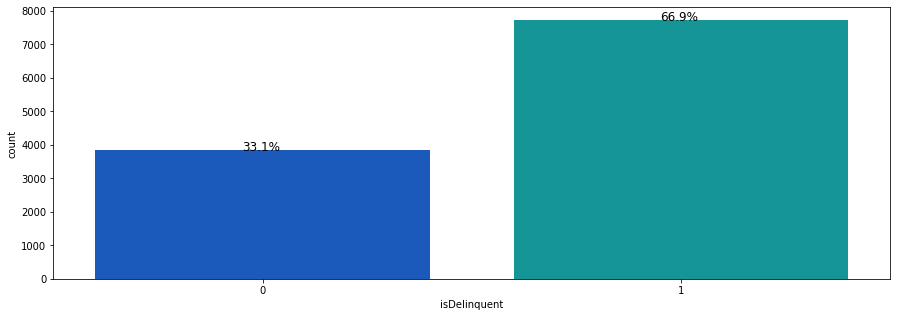

In [16]:
plt.figure(figsize=(15,5))
ax = sns.countplot(loan["isDelinquent"],palette='winter')
perc_on_bar(ax,loan["isDelinquent"])

* 66% of the customers are delinquent

## Observations on term

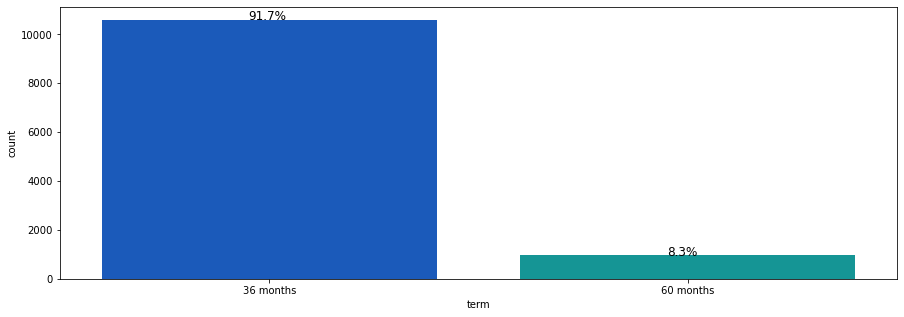

In [17]:
plt.figure(figsize=(15,5))
ax = sns.countplot(loan["term"],palette='winter')
perc_on_bar(ax,loan["term"])

* 91.7% of the loans are for a 36 month term.

## Observations on gender

In [2]:
plt.figure(figsize=(15,5))
ax = sns.countplot(loan["gender"],palette='winter')
perc_on_bar(ax,loan["gender"])

NameError: name 'plt' is not defined

* There are more male applicants (56.8%) than female applicants (43.2%)

## Observations on purpose

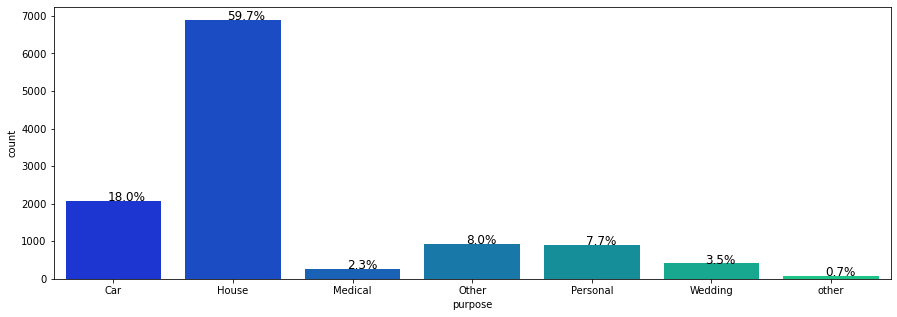

In [19]:
plt.figure(figsize=(15,5))
ax = sns.countplot(loan["purpose"],palette='winter')
perc_on_bar(ax,loan["purpose"])

* Most loan applications are for house loans (59.7%) followed by car loans (18%)
* There are 2 levels named 'other' and 'Other' under the purpose variable. Since we do not have any other information about these, we can merge these levels.

## Observations on home_ownership

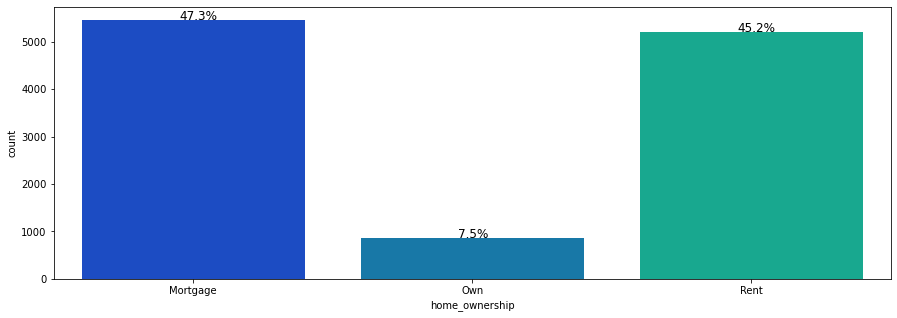

In [20]:
plt.figure(figsize=(15,5))
ax = sns.countplot(loan["home_ownership"],palette='winter')
perc_on_bar(ax,loan["home_ownership"])

* Very few applicants <10% own their house, Most customers have either mortgaged their houses or live on rent. 

## Observations on age

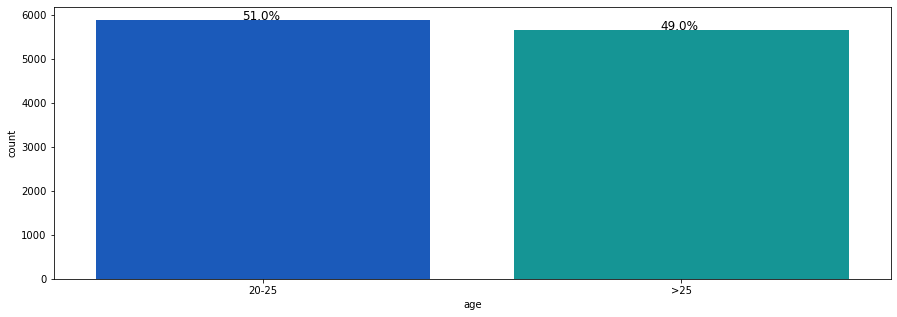

In [21]:
plt.figure(figsize=(15,5))
ax = sns.countplot(loan["age"],palette='winter')
perc_on_bar(ax,loan["age"])

* Almost an equal percentage of people aged 20-25 and >25 have applied for the loan.

## Observations on FICO

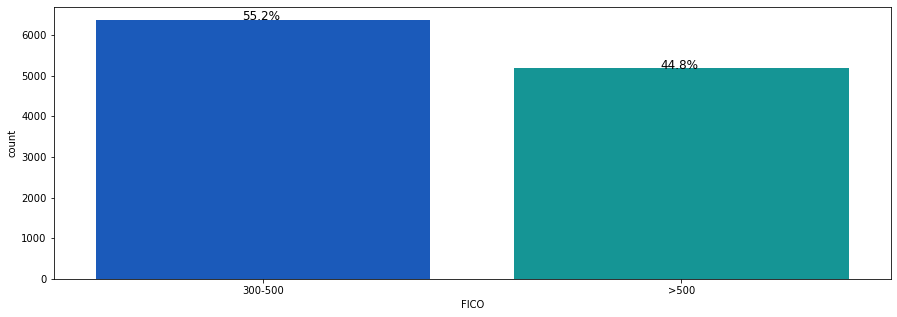

In [22]:
plt.figure(figsize=(15,5))
ax = sns.countplot(loan["FICO"],palette='winter')
perc_on_bar(ax,loan["FICO"])

* Most customers have a FICO score between 300 and 500 (55.2%) followed by a score of greater than 500 (44.8%)

## Data Cleaning

In [23]:
loan["purpose"].unique()

[House, Car, Other, Personal, Wedding, Medical, other]
Categories (7, object): [House, Car, Other, Personal, Wedding, Medical, other]

### We can merge the purpose -  'other' and 'Other' together

In [24]:
loan["purpose"].replace('other',"Other",inplace=True)

In [25]:
loan["purpose"].unique()

[House, Car, Other, Personal, Wedding, Medical]
Categories (6, object): [House, Car, Other, Personal, Wedding, Medical]

## Bivariate Analysis

In [26]:
## Function to plot stacked bar chart
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,loan['isDelinquent'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,loan['isDelinquent'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    #plt.legend(loc='lower left', frameon=False)
    #plt.legend(loc="upper left", bbox_to_anchor=(0,1))
    plt.show()

isDelinquent     0     1    All
term                           
36 months     3168  7421  10589
60 months      659   300    959
All           3827  7721  11548
------------------------------------------------------------------------------------------------------------------------


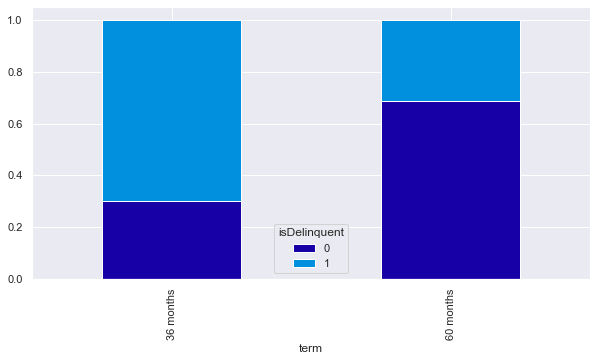

In [27]:
stacked_plot(loan['term'])

* Most loan delinquent customers have taken loan for 36 months.

isDelinquent     0     1    All
gender                         
Female        1850  3143   4993
Male          1977  4578   6555
All           3827  7721  11548
------------------------------------------------------------------------------------------------------------------------


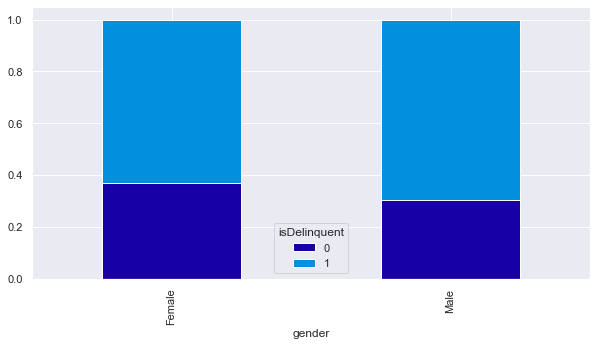

In [28]:
stacked_plot(loan['gender'])

* There's not much difference between male and female customers.

isDelinquent     0     1    All
purpose                        
Car            678  1402   2080
House         2272  4620   6892
Medical        107   159    266
Other          357   653   1010
Personal       274   618    892
Wedding        139   269    408
All           3827  7721  11548
------------------------------------------------------------------------------------------------------------------------


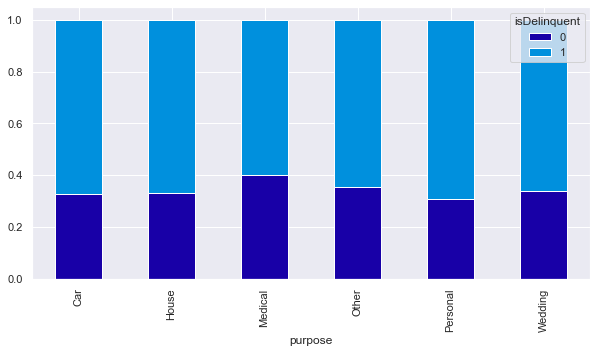

In [29]:
stacked_plot(loan['purpose'])

* Most loan delinquent customers are those who have applied for house loans followed by car and personal loans.

isDelinquent       0     1    All
home_ownership                   
Mortgage        1831  3630   5461
Own              259   612    871
Rent            1737  3479   5216
All             3827  7721  11548
------------------------------------------------------------------------------------------------------------------------


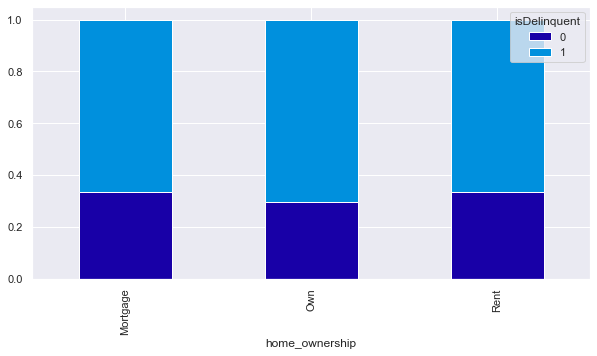

In [30]:
stacked_plot(loan['home_ownership'])

* Those customers who have their own house are less delinquent than the ones who live in a rented place or have mortgaged their home.

isDelinquent     0     1    All
age                            
20-25         1858  4030   5888
>25           1969  3691   5660
All           3827  7721  11548
------------------------------------------------------------------------------------------------------------------------


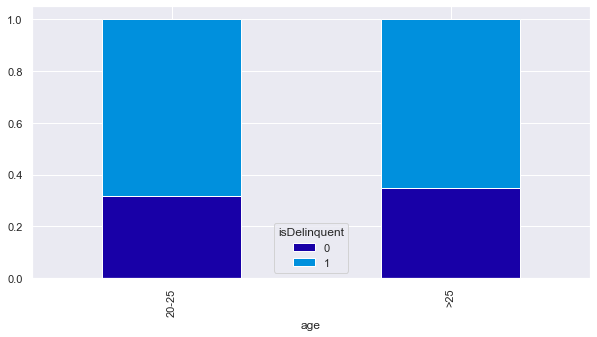

In [31]:
stacked_plot(loan['age'])

* Customers between 20-25 years of age are more delinquent.

isDelinquent     0     1    All
FICO                           
300-500        941  5429   6370
>500          2886  2292   5178
All           3827  7721  11548
------------------------------------------------------------------------------------------------------------------------


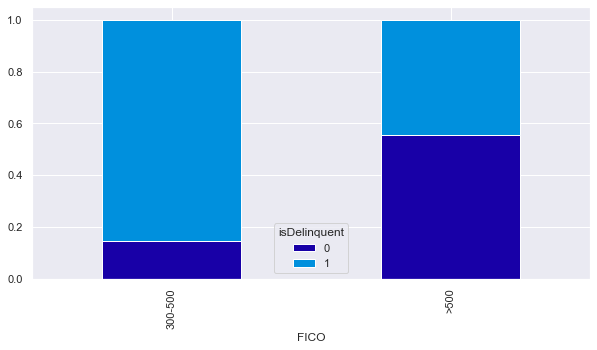

In [32]:
stacked_plot(loan['FICO'])

* If FICO score is >500 the chances of delinquency decrease quite a lot compared to when FICO score is between 300-500.

### Key Observations - 
* FICO score and term of loan application appear to be very strong indicators of delinquency.

* Other factors appear to be not very good indicators of delinquency. (We can use chi-square tests to determine statistical significance in the association between two categorical variables).

### We observed that a high FICO score means that the chances of delinquency are lower, let us see  if any of the other variables indicate higher a FICO score.

In [33]:
def stacked_plot_FICO(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,loan['FICO'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,loan['FICO'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    #plt.legend(loc='lower left', frameon=False)
    #plt.legend(loc="upper left", bbox_to_anchor=(0,1))
    plt.show()

FICO            300-500  >500    All
home_ownership                      
Mortgage           2857  2604   5461
Own                 480   391    871
Rent               3033  2183   5216
All                6370  5178  11548
------------------------------------------------------------------------------------------------------------------------


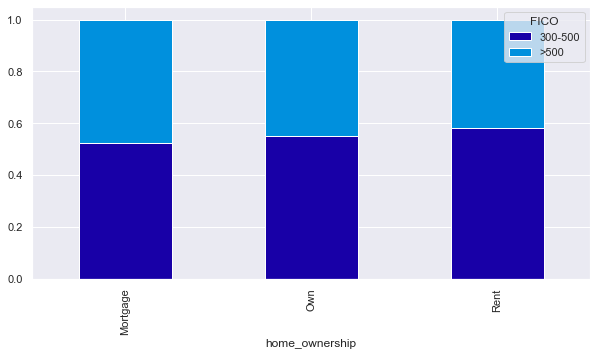

In [34]:
stacked_plot_FICO(loan['home_ownership'])

FICO   300-500  >500    All
age                        
20-25     3927  1961   5888
>25       2443  3217   5660
All       6370  5178  11548
------------------------------------------------------------------------------------------------------------------------


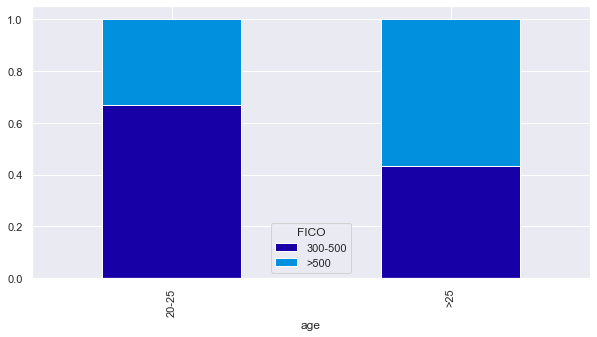

In [35]:
stacked_plot_FICO(loan['age'])

FICO    300-500  >500    All
gender                      
Female     2665  2328   4993
Male       3705  2850   6555
All        6370  5178  11548
------------------------------------------------------------------------------------------------------------------------


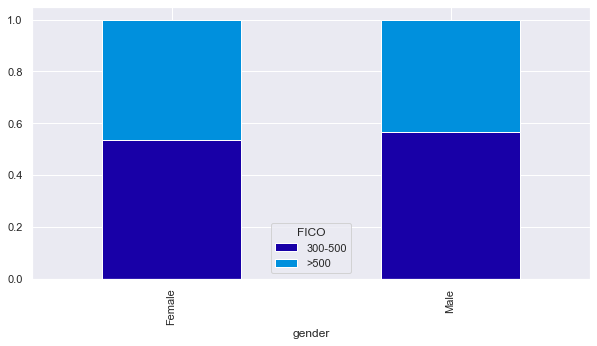

In [36]:
stacked_plot_FICO(loan['gender'])

## Key Observations

1. Home ownership and gender seem to have a slight impact on the FICO scores.
2. Age seems to have a much bigger impact on FICO scores.

### Let us check which of these differences are statistically significant.

The Chi-Square test is a statistical method to determine if two categorical variables have a significant correlation between them.
  
**Null Hypothesis -** There is no association between the two variables.      
**Alternate Hypothesis -** There is an association between two variables.

In [37]:
crosstab = pd.crosstab(loan['FICO'],loan['home_ownership'])  # Contingency table of region and smoker attributes

Ho = "FICO score has no effect on home ownership"   # Stating the Null Hypothesis
Ha = "FICO score has an effect on home ownership"   # Stating the Alternate Hypothesis

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

FICO score has an effect on home ownership as the p_value (0.0) < 0.05


In [38]:
crosstab = pd.crosstab(loan['FICO'],loan['gender'])  # Contingency table of region and smoker attributes

Ho = "FICO score has no effect on gender"   # Stating the Null Hypothesis
Ha = "FICO score has an effect on gender"   # Stating the Alternate Hypothesis

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

FICO score has an effect on gender as the p_value (0.001) < 0.05


In [39]:
crosstab = pd.crosstab(loan['FICO'],loan['age'])  # Contingency table of region and smoker attributes

Ho = "FICO score has no effect on age"   # Stating the Null Hypothesis
Ha = "FICO score has an effect on age"   # Stating the Alternate Hypothesis

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

FICO score has an effect on age as the p_value (0.0) < 0.05


## Key Observations-

* P-value for all tests < 0.01. Hence, all the differences that we see in the 3 plots are statistically significant.
* There is a correlation between FICO Score and house_ownership. People who have mortgaged their houses have higher FICO scores than people who own the house (peculiar!).
* There is a correlation between FICO Score and gender. More females have >500 FICO scores as compared to Males.
* There is a correlation between FICO Score and age. People >25 years of age have higher FICO scores as compared to people of age 20-25. 

## Model Building - Approach
1. Data preparation
2. Partition the data into train and test set.
3. Built a CART model on the train data.
4. Tune the model and prune the tree, if required.
5. Test the data on test set.

## Split Data

In [40]:
x = loan.drop(["isDelinquent"], axis=1)
y = loan["isDelinquent"]

In [41]:
# encoding the categorical variables
x = pd.get_dummies(x, drop_first=True)
x.head()

,term_60 months,gender_Male,purpose_House,purpose_Medical,purpose_Other,purpose_Personal,purpose_Wedding,home_ownership_Own,home_ownership_Rent,age_>25,FICO_>500
0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,1,0,1
2,0,0,1,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,1,1,0


In [42]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.4 , random_state=1)

In [43]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(6928, 11)
(4620, 11)
(6928,)
(4620,)


## Build Decision Tree Model

We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split.

In [44]:
y.value_counts()

1    7721
0    3827
Name: isDelinquent, dtype: int64

In [45]:
model = DecisionTreeClassifier(criterion = 'gini', random_state=1)
model.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=1)

## Scoring our Decision Tree

In [46]:
# accuracy on training set
print("Accuracy on train set", model.score(xtrain,ytrain))

# accuracy on test set
print("Accuracy on test set", model.score(xtest,ytest))

Accuracy on train set 0.855513856812933
Accuracy on test set 0.8437229437229438


**What does a bank want?**
* A bank wants to minimize the loss - it can face 2 types of losses here: 
   * Whenever a bank lends money to a customer, they don't return that.
   * A bank doesn't lend money to a customer thinking a customer will default but in reality, the customer won't - opportunity loss.

**Which loss is greater ?**
* Lending to a customer who wouldn't be able to pay back.

**Since we want to reduce loan delinquency we should use Recall as a metric of model evaluation instead of accuracy.**

* Recall - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives, i.e. low chances of predicting loan-delinquent customers as a non-loan-delinquent customer.

In [47]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(xtest)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

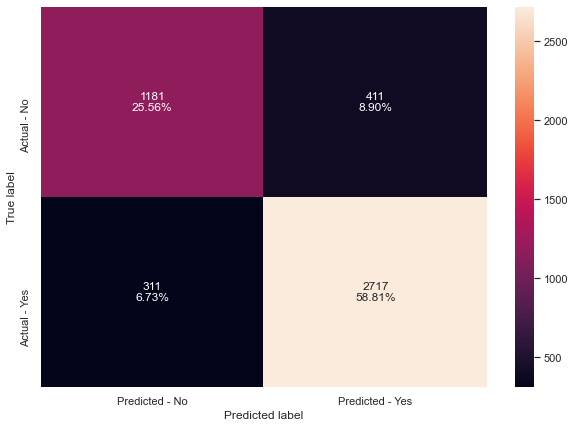

In [48]:
make_confusion_matrix(model,ytest)

In [49]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(xtrain)
    pred_test = model.predict(xtest)
    print("Recall on training set : ",metrics.recall_score(ytrain,pred_train))
    print("Recall on test set : ",metrics.recall_score(ytest,pred_test))

In [50]:
get_recall_score(model)

Recall on training set :  0.908800340933305
Recall on test set :  0.8972919418758256


* Recall on training and test set is very good.

## Visualizing the Decision Tree

In [51]:
column_names = list(x.columns)
feature_names = column_names
print(feature_names)

['term_60 months', 'gender_Male', 'purpose_House', 'purpose_Medical', 'purpose_Other', 'purpose_Personal', 'purpose_Wedding', 'home_ownership_Own', 'home_ownership_Rent', 'age_>25', 'FICO_>500']


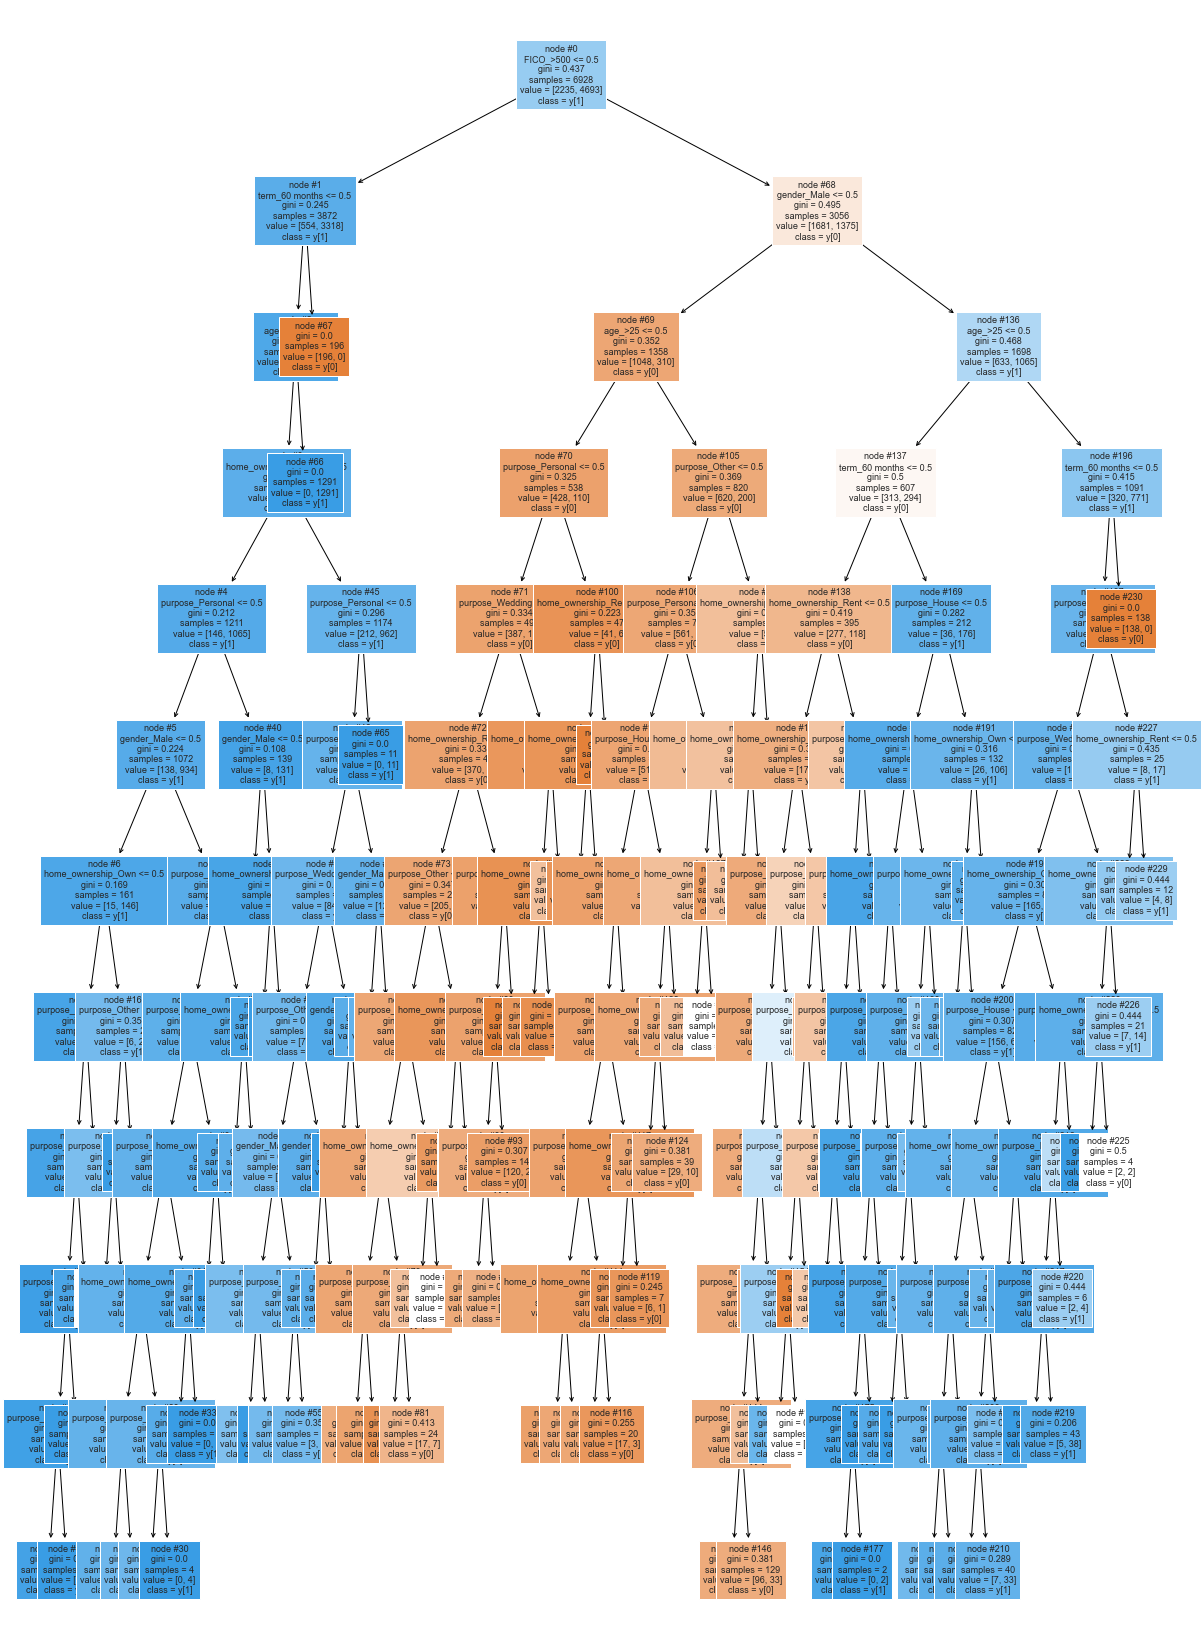

In [52]:
plt.figure(figsize=(20,30))

out = tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [53]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- FICO_>500 <= 0.50
|   |--- term_60 months <= 0.50
|   |   |--- age_>25 <= 0.50
|   |   |   |--- home_ownership_Rent <= 0.50
|   |   |   |   |--- purpose_Personal <= 0.50
|   |   |   |   |   |--- gender_Male <= 0.50
|   |   |   |   |   |   |--- home_ownership_Own <= 0.50
|   |   |   |   |   |   |   |--- purpose_Medical <= 0.50
|   |   |   |   |   |   |   |   |--- purpose_House <= 0.50
|   |   |   |   |   |   |   |   |   |--- purpose_Other <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- purpose_Wedding <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [1.00, 18.00] class: 1
|   |   |   |   |   |   |   |   |   |   |--- purpose_Wedding >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 9.00] class: 1
|   |   |   |   |   |   |   |   |   |--- purpose_Other >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 14.00] class: 1
|   |   |   |   |   |   |   |   |--- purpose_House >  0.50
|   |   |   |   |   |   |   |   |   |--- weight

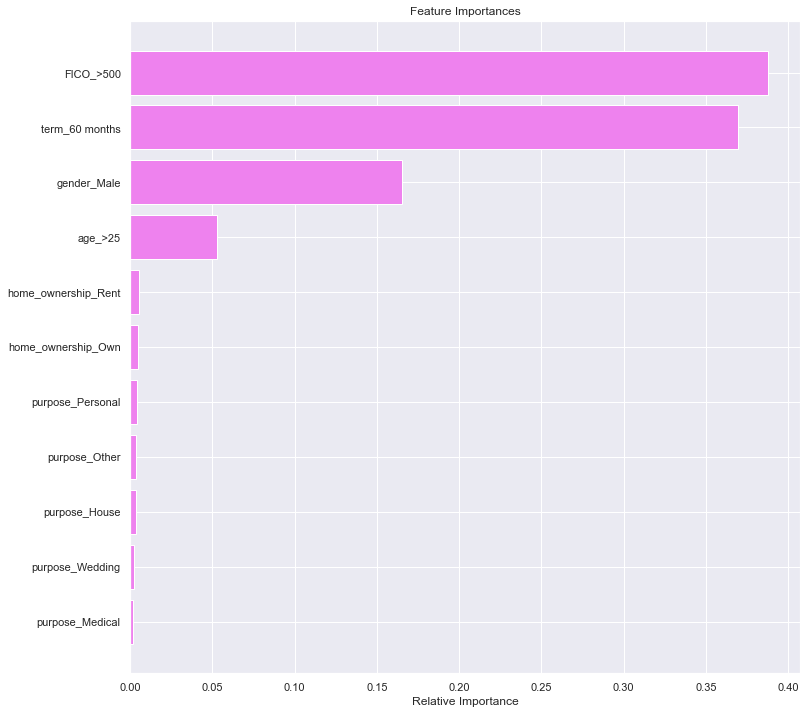

In [54]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* FICO score, duration of loan and gender are the top 3 important features.

### Using GridSearch for Hyperparameter tuning of our tree model 
* Let's see if we can improve our model performance even more.

In [55]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [5, 10,15,20,25,30],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(xtrain, ytrain)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=1, max_leaf_nodes=5, min_impurity_decrease=0.1,
                       random_state=1)

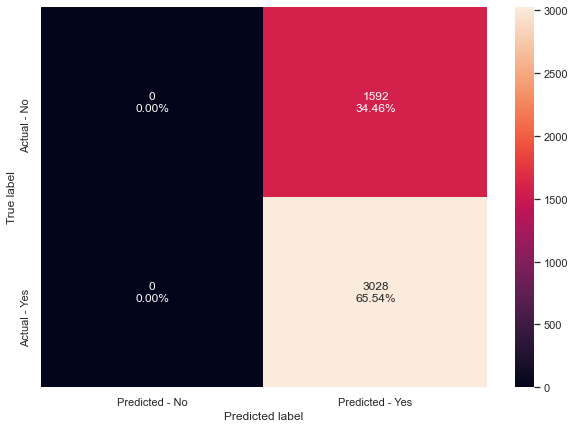

In [56]:
make_confusion_matrix(estimator,ytest)

* We can see that our model has performed very badly even tho we would be getting high recall but our model is not able to distinguish between loan delinquent and non delinquent customers.

In [57]:
get_recall_score(estimator)

Recall on training set :  1.0
Recall on test set :  1.0


In [58]:
column_names = list(x.columns)
feature_names = column_names
print(feature_names)

['term_60 months', 'gender_Male', 'purpose_House', 'purpose_Medical', 'purpose_Other', 'purpose_Personal', 'purpose_Wedding', 'home_ownership_Own', 'home_ownership_Rent', 'age_>25', 'FICO_>500']


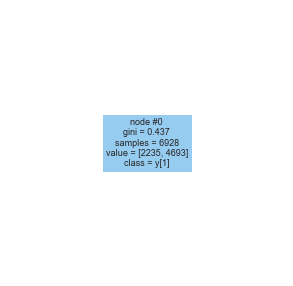

In [59]:
plt.figure(figsize=(5,5))

tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

* We are only getting a root node, hyperparameter tuning didn't help our model.

## Cost Complexity Pruning

In [60]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(xtrain, ytrain)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [61]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,0.226403
1,0.000000e+00,0.226403
2,2.794668e-09,0.226403
3,2.244984e-07,0.226403
4,4.918264e-07,0.226404
...,...,...
80,1.124860e-02,0.248618
81,1.417137e-02,0.276961
82,3.466595e-02,0.311627
83,4.376431e-02,0.355391


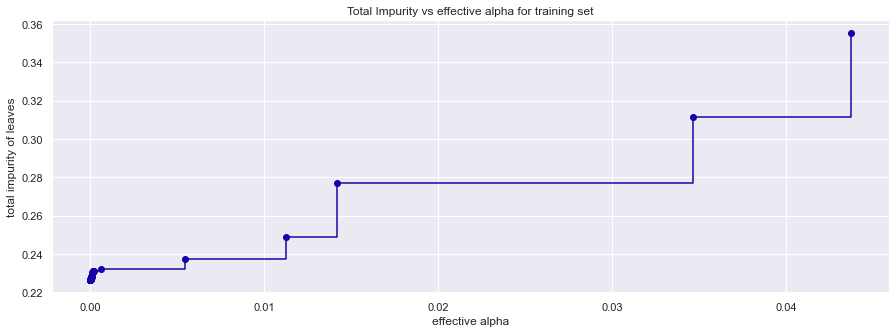

In [62]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [63]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(xtrain, ytrain)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08167024657332106



For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

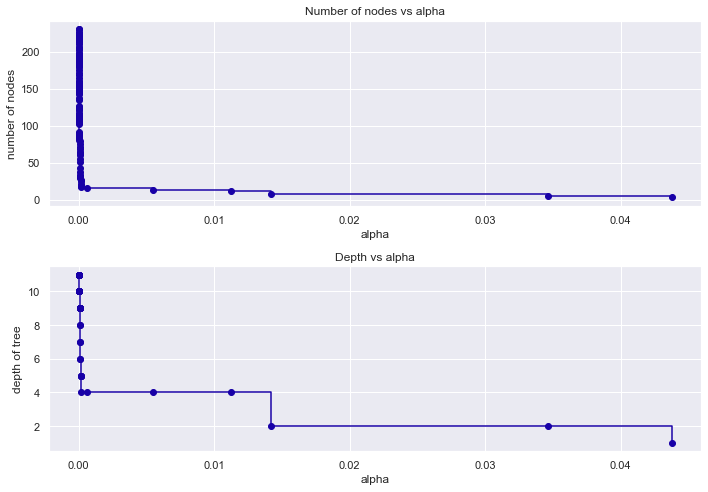

In [64]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Recall vs alpha for training and testing sets
----------------------------------------------------

In [65]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(xtrain)
    values_train=metrics.recall_score(ytrain,pred_train3)
    recall_train.append(values_train)

In [66]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(xtest)
    values_test=metrics.recall_score(ytest,pred_test3)
    recall_test.append(values_test)

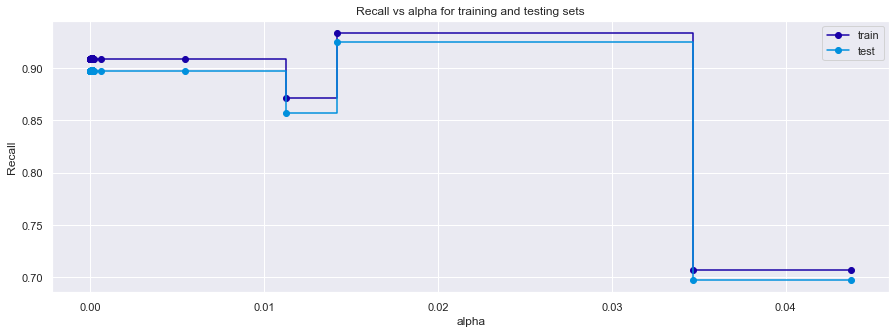

In [67]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [68]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.014171370928955346, random_state=1)


In [69]:
get_recall_score(best_model)

Recall on training set :  0.933944172171319
Recall on test set :  0.9247027741083224


* With post-pruning we get the highest recall on both training and test set

## Confusion Matrix

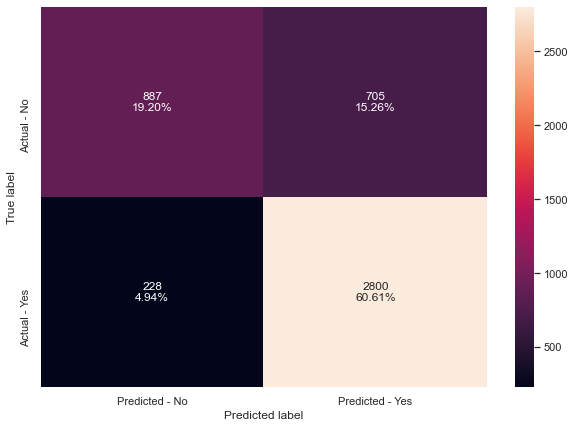

In [70]:
make_confusion_matrix(best_model,ytest)

## Visualizing the Decision Tree

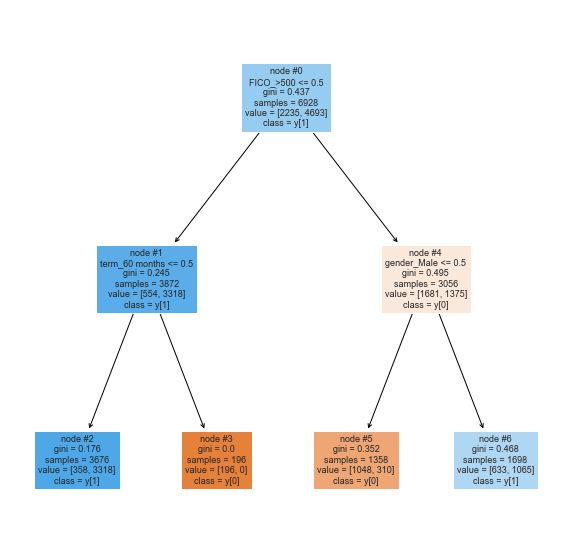

In [71]:
plt.figure(figsize=(10,10))

out = tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [72]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model,feature_names=feature_names,show_weights=True))

|--- FICO_>500 <= 0.50
|   |--- term_60 months <= 0.50
|   |   |--- weights: [358.00, 3318.00] class: 1
|   |--- term_60 months >  0.50
|   |   |--- weights: [196.00, 0.00] class: 0
|--- FICO_>500 >  0.50
|   |--- gender_Male <= 0.50
|   |   |--- weights: [1048.00, 310.00] class: 0
|   |--- gender_Male >  0.50
|   |   |--- weights: [633.00, 1065.00] class: 1



In [73]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = xtrain.columns).sort_values(by = 'Imp', ascending = False))

                          Imp
FICO_>500            0.510119
term_60 months       0.273355
gender_Male          0.216526
purpose_House        0.000000
purpose_Medical      0.000000
purpose_Other        0.000000
purpose_Personal     0.000000
purpose_Wedding      0.000000
home_ownership_Own   0.000000
home_ownership_Rent  0.000000
age_>25              0.000000


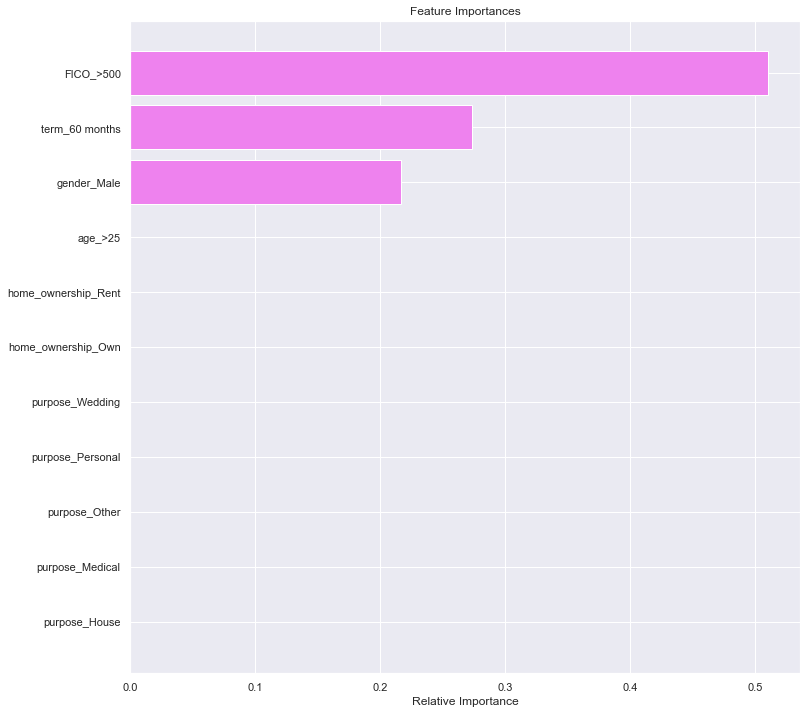

In [74]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* FICO score, duration of the loan, and gender remain the most important feature with post-pruning too.

## Comparing all the decision tree models

In [75]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision treee with hyperparameter tuning',
                                         'Decision tree with post-pruning'], 'Train_Recall':[0.90,1,0.93], 'Test_Recall':[0.89,1,0.92]}) 
comparison_frame

,Model,Train_Recall,Test_Recall
0,Initial decision tree model,0.90,0.89
1,Decision treee with hyperparameter tuning,1.00,1.00
2,Decision tree with post-pruning,0.93,0.92


**Decision tree with post-pruning is giving the highest recall on the test set, even though we got recall as 1 with hyperparameter tuning but that model wasn't a generalized one**

## Business Insights

* FICO, term and gender (in that order) are the most important variables in determining if a borrower will get into a delinquent stage 
* No borrower shall be given a loan if they are applying for a 36 month term loan and 
have a FICO score in the range 300-500.
* Female borrowers with a FICO score greater than 500 should be our target customers.
* Criteria to approve loan according to decision tree model should depend on three main factors - FICO score, duration of loan and gender that is - If the FICO score is less than 500 and the duration of loan is less than 60 months then the customer will not be able to repay the loans. If the customer has greater than 500 FICO score and is a female higher chances that they will repay the loans.

### Things to try
* Try tuning the model using the diffrent hyper-parameters.